In [79]:
# Importing necessary libraries , rest of the libraries imported as and when needed
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df_vehicle=pd.read_csv('vehicle.csv')  # reading data file

In [3]:
df_vehicle.head()   # viewing first 5 records

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df_vehicle.describe()    # exploring the statistical features

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [5]:
df_vehicle.shape

(846, 19)

In [6]:
df_vehicle.columns.T  # Seeing column name in data frame

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [7]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [8]:
df_vehicle.isna().sum()   # looking for missing values , so those can be imputed

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
#df_vehicle.isnull().sum()   # This is same as 'na' values

In [10]:
df_vehicle[df_vehicle['circularity'].isnull()==True]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
266           86          NaN                  65.0         116.0   
396          108          NaN                 106.0         177.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
266                  53.0                        6          152.0   
396                  51.0                        5          256.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5             26.0                    28.0                        169   
105           30.0                    25.0                        168   
118           46.0                    19.0                        144   
266           45.0                    19.0                        141   
396           26.0                    28.0                        170   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5              280.0              957.0                      264.0   
105              NaN              711.0                      214.0   
118            168.0              324.0                      173.0   
266            175.0              335.0                        NaN   
396            285.0              966.0                      261.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
266                         85.0             5.0               4.0   
396                         87.0            11.0               2.0   

     skewness_about.2  hollows_ratio class  
5               181.0            183   bus  
105             188.0            199   car  
118             180.0            184   bus  
266             179.0            183   bus  
396             182.0            181   bus

In [11]:
df_vehicle['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [12]:
df_vehicle.groupby('class').count()  # checking number of values for each class

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [13]:
df_vehicle.groupby('class').median()  # seeing median for each feature respective to the class

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus             89         44.0                  72.0         167.5   
car             97         46.0                  94.0         186.0   
van             90         42.0                  75.0         144.0   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                    64.0                        6          152.0   
car                    61.0                        9          185.0   
van                    59.0                        9          142.0   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus             44.0                    19.0                        145   
car             36.0                    22.0                        150   
van             47.0                    18.0                        145   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus              177.0              344.0                      176.0   
car              206.0              512.0                      182.0   
van              164.0              300.0                      159.0   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                           76.0             5.0              10.0   
car                           70.0             6.0              14.0   
van                           72.0             6.0               9.0   

       skewness_about.2  hollows_ratio  
class                                   
bus               186.0            189  
car               189.0            198  
van               188.0            196

In [57]:
df_vehicle.groupby('class').mean()  # seeing mean for each feature respective to the class

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
0        91.591743    44.963303             76.701835    165.724771   
1        96.184149    46.034965             88.878788    180.629371   
2        90.562814    42.070352             73.256281    144.853015   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
0                 62.926606                 6.431193     170.022936   
1                 60.993007                 8.825175     181.062937   
2                 59.577889                 8.442211     141.537688   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
0          40.114679               20.573394                 146.701835   
1          38.088578               21.512821                 149.967366   
2          47.939698               18.572864                 145.175879   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
0           192.889908         442.986239                 180.986239   
1           197.932401         500.596737                 179.613054   
2           163.256281         298.201005                 157.276382   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
0                        76.302752        4.798165         10.211009   
1                        69.925408        6.699301         15.097902   
2                        71.482412        6.417085          9.698492   

       skewness_about.2  hollows_ratio  
class                                   
0            187.811927     191.325688  
1            189.473193     197.582751  
2            188.939698     196.145729

In [15]:
for col in df_vehicle.columns:   
    if col == 'class':
        break
        
    df_vehicle[col]=df_vehicle.groupby('class')[col].transform(lambda x: x.fillna(x.median()))

In [16]:
#df_vehicle['circularity']=df_vehicle.groupby('class').circularity.transform(lambda x: x.fillna(x.median()))

In [17]:
df_vehicle.replace({'class': {'bus' : 0,'car' : 1,'van' : 2}},inplace=True)  # assiging numeric value to target class so object can be converted to numeric
df_vehicle['class']=pd.to_numeric(df_vehicle['class'])
df_vehicle.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         186.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0        

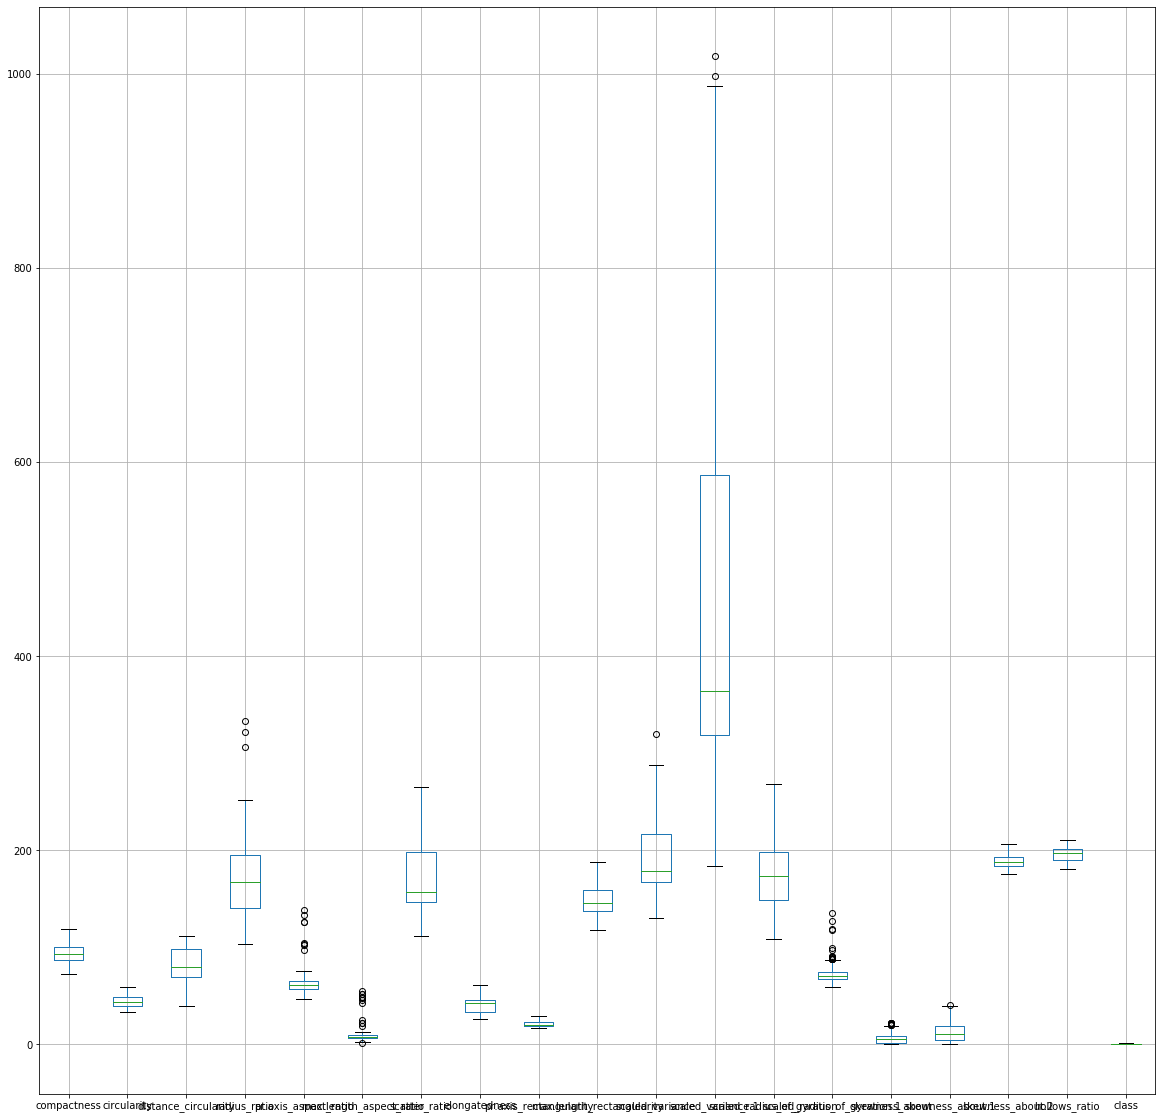

In [18]:
df_vehicle.boxplot(figsize=(30,20),);  # looking for boxplot,to determine outliers  in various features. 
# It is evident that there are high number of outliers in certain features

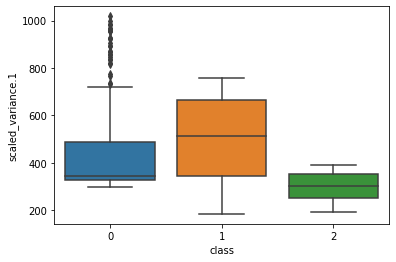

In [19]:
sns.boxplot(y='scaled_variance.1',x='class',data=df_vehicle)

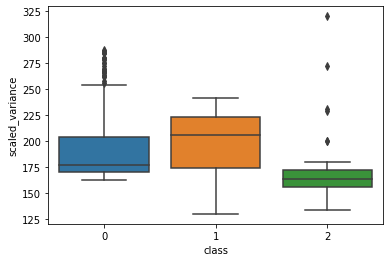

In [20]:
sns.boxplot(y='scaled_variance',x='class',data=df_vehicle)

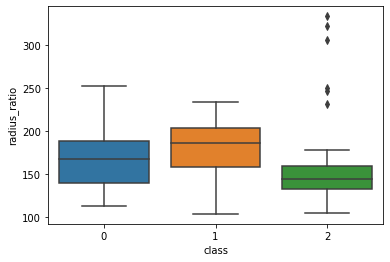

In [21]:
sns.boxplot(y='radius_ratio',x='class',data=df_vehicle)

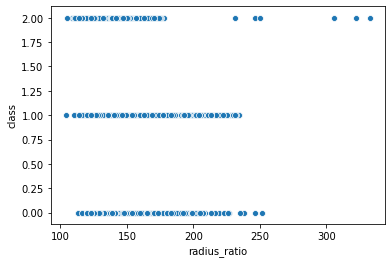

In [22]:
sns.scatterplot(x='radius_ratio',y='class',data=df_vehicle)

In [23]:
for col in df_vehicle.columns:
    if col == 'class':
        continue
    
    quart75=np.percentile(df_vehicle[col],75)
    quart25=np.percentile(df_vehicle[col],25)
    iqr=quart75-quart25
    l_point=quart25-(1.5*iqr)
    u_point=quart75+(1.5*iqr)
    df_vehicle.loc[(df_vehicle[col] < l_point) | (df_vehicle[col] > u_point),col]=df_vehicle[col].median()

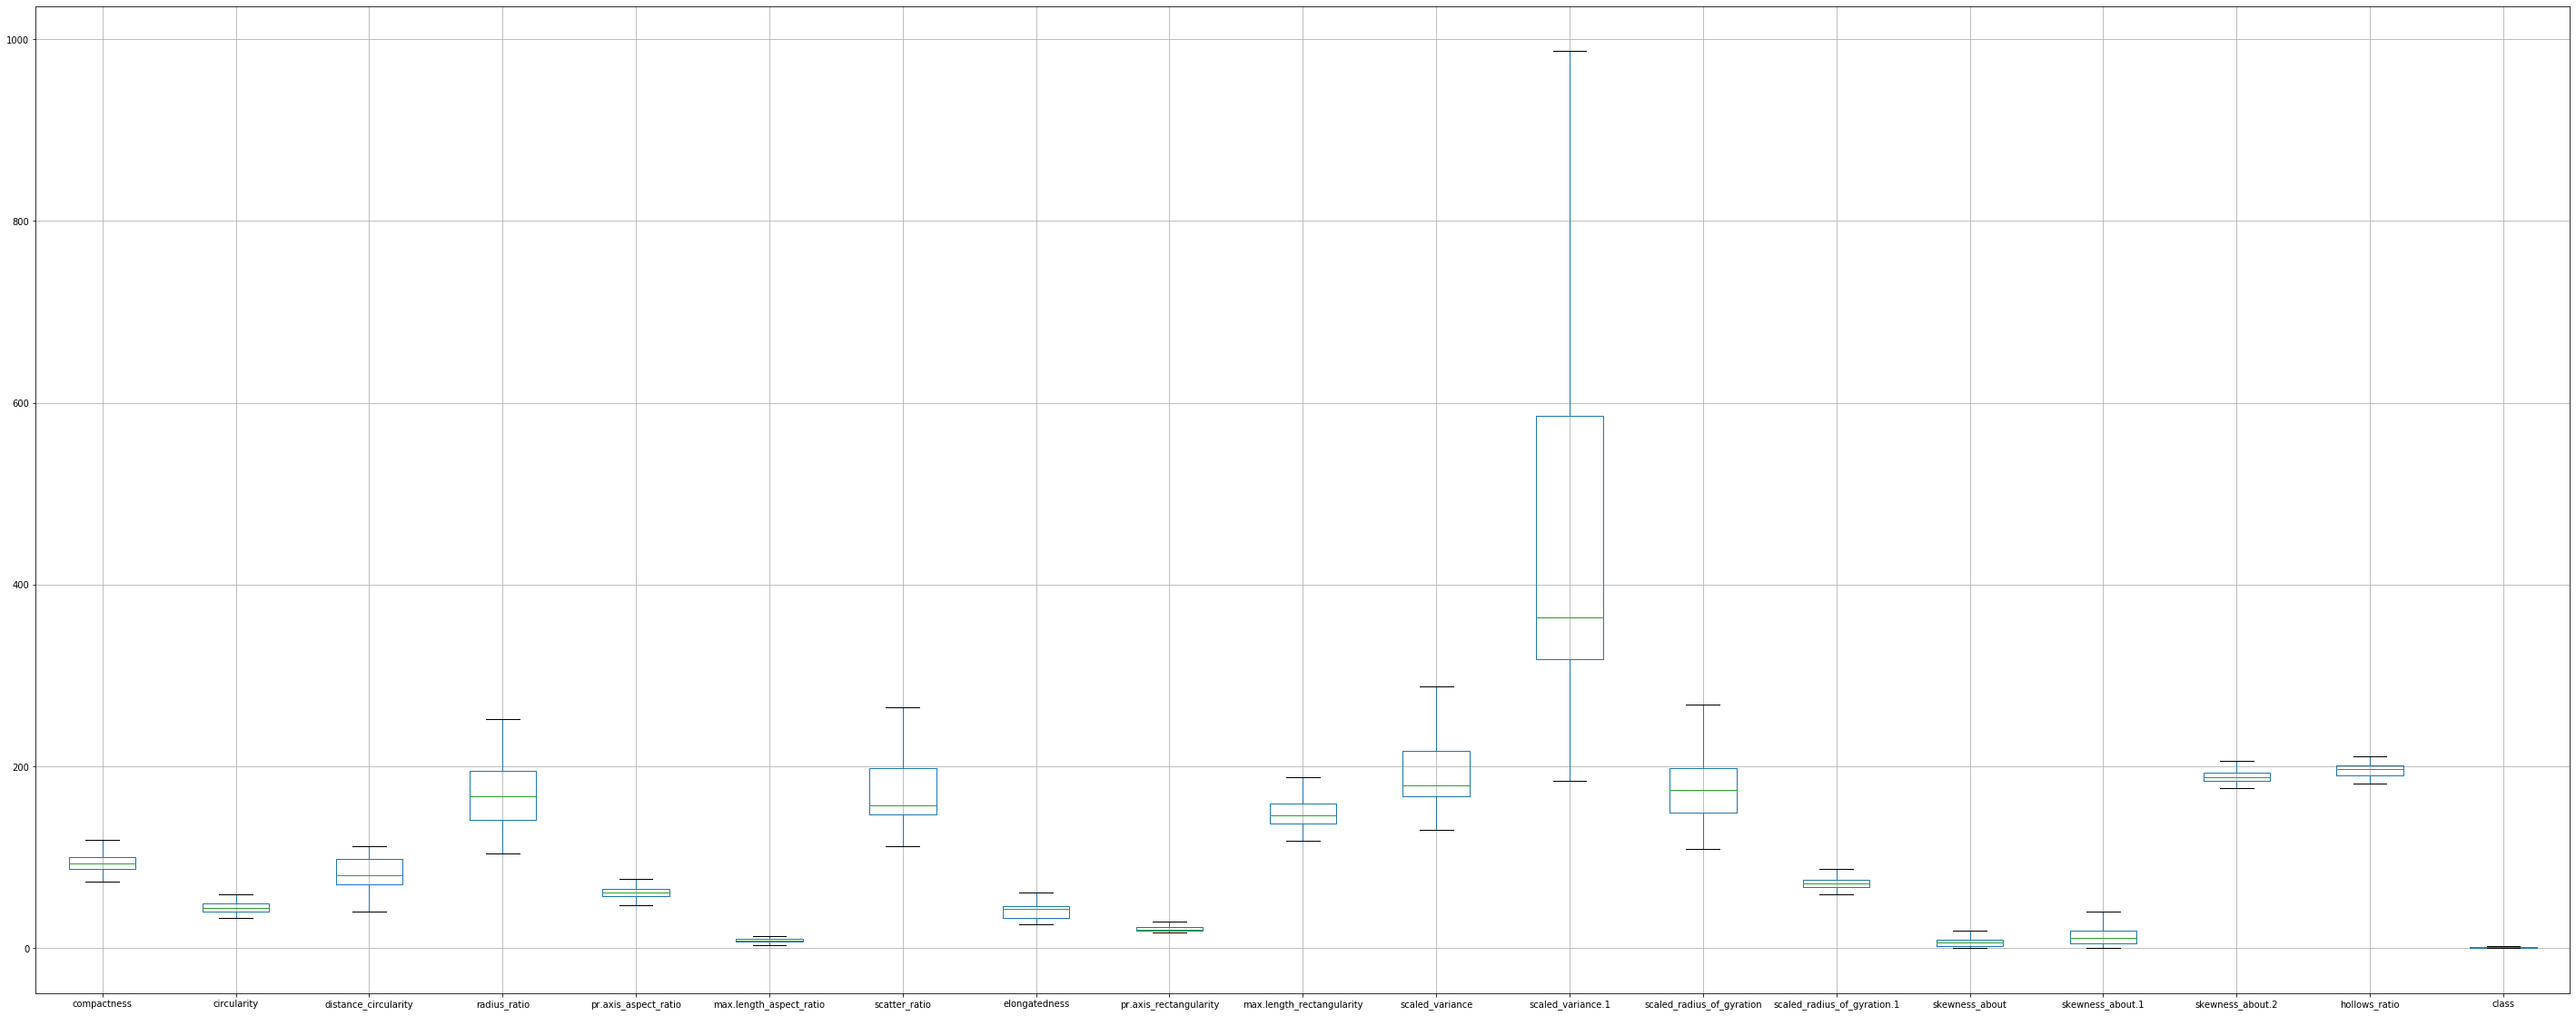

In [24]:
df_vehicle.boxplot(figsize=(50,20),); # Below boxplot show there are no outliers in the data now

In [25]:
#df_vehicle[df_vehicle['circularity'].isnull()==True]

In [26]:
#df_vehicle.iloc[[5,105,118],]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


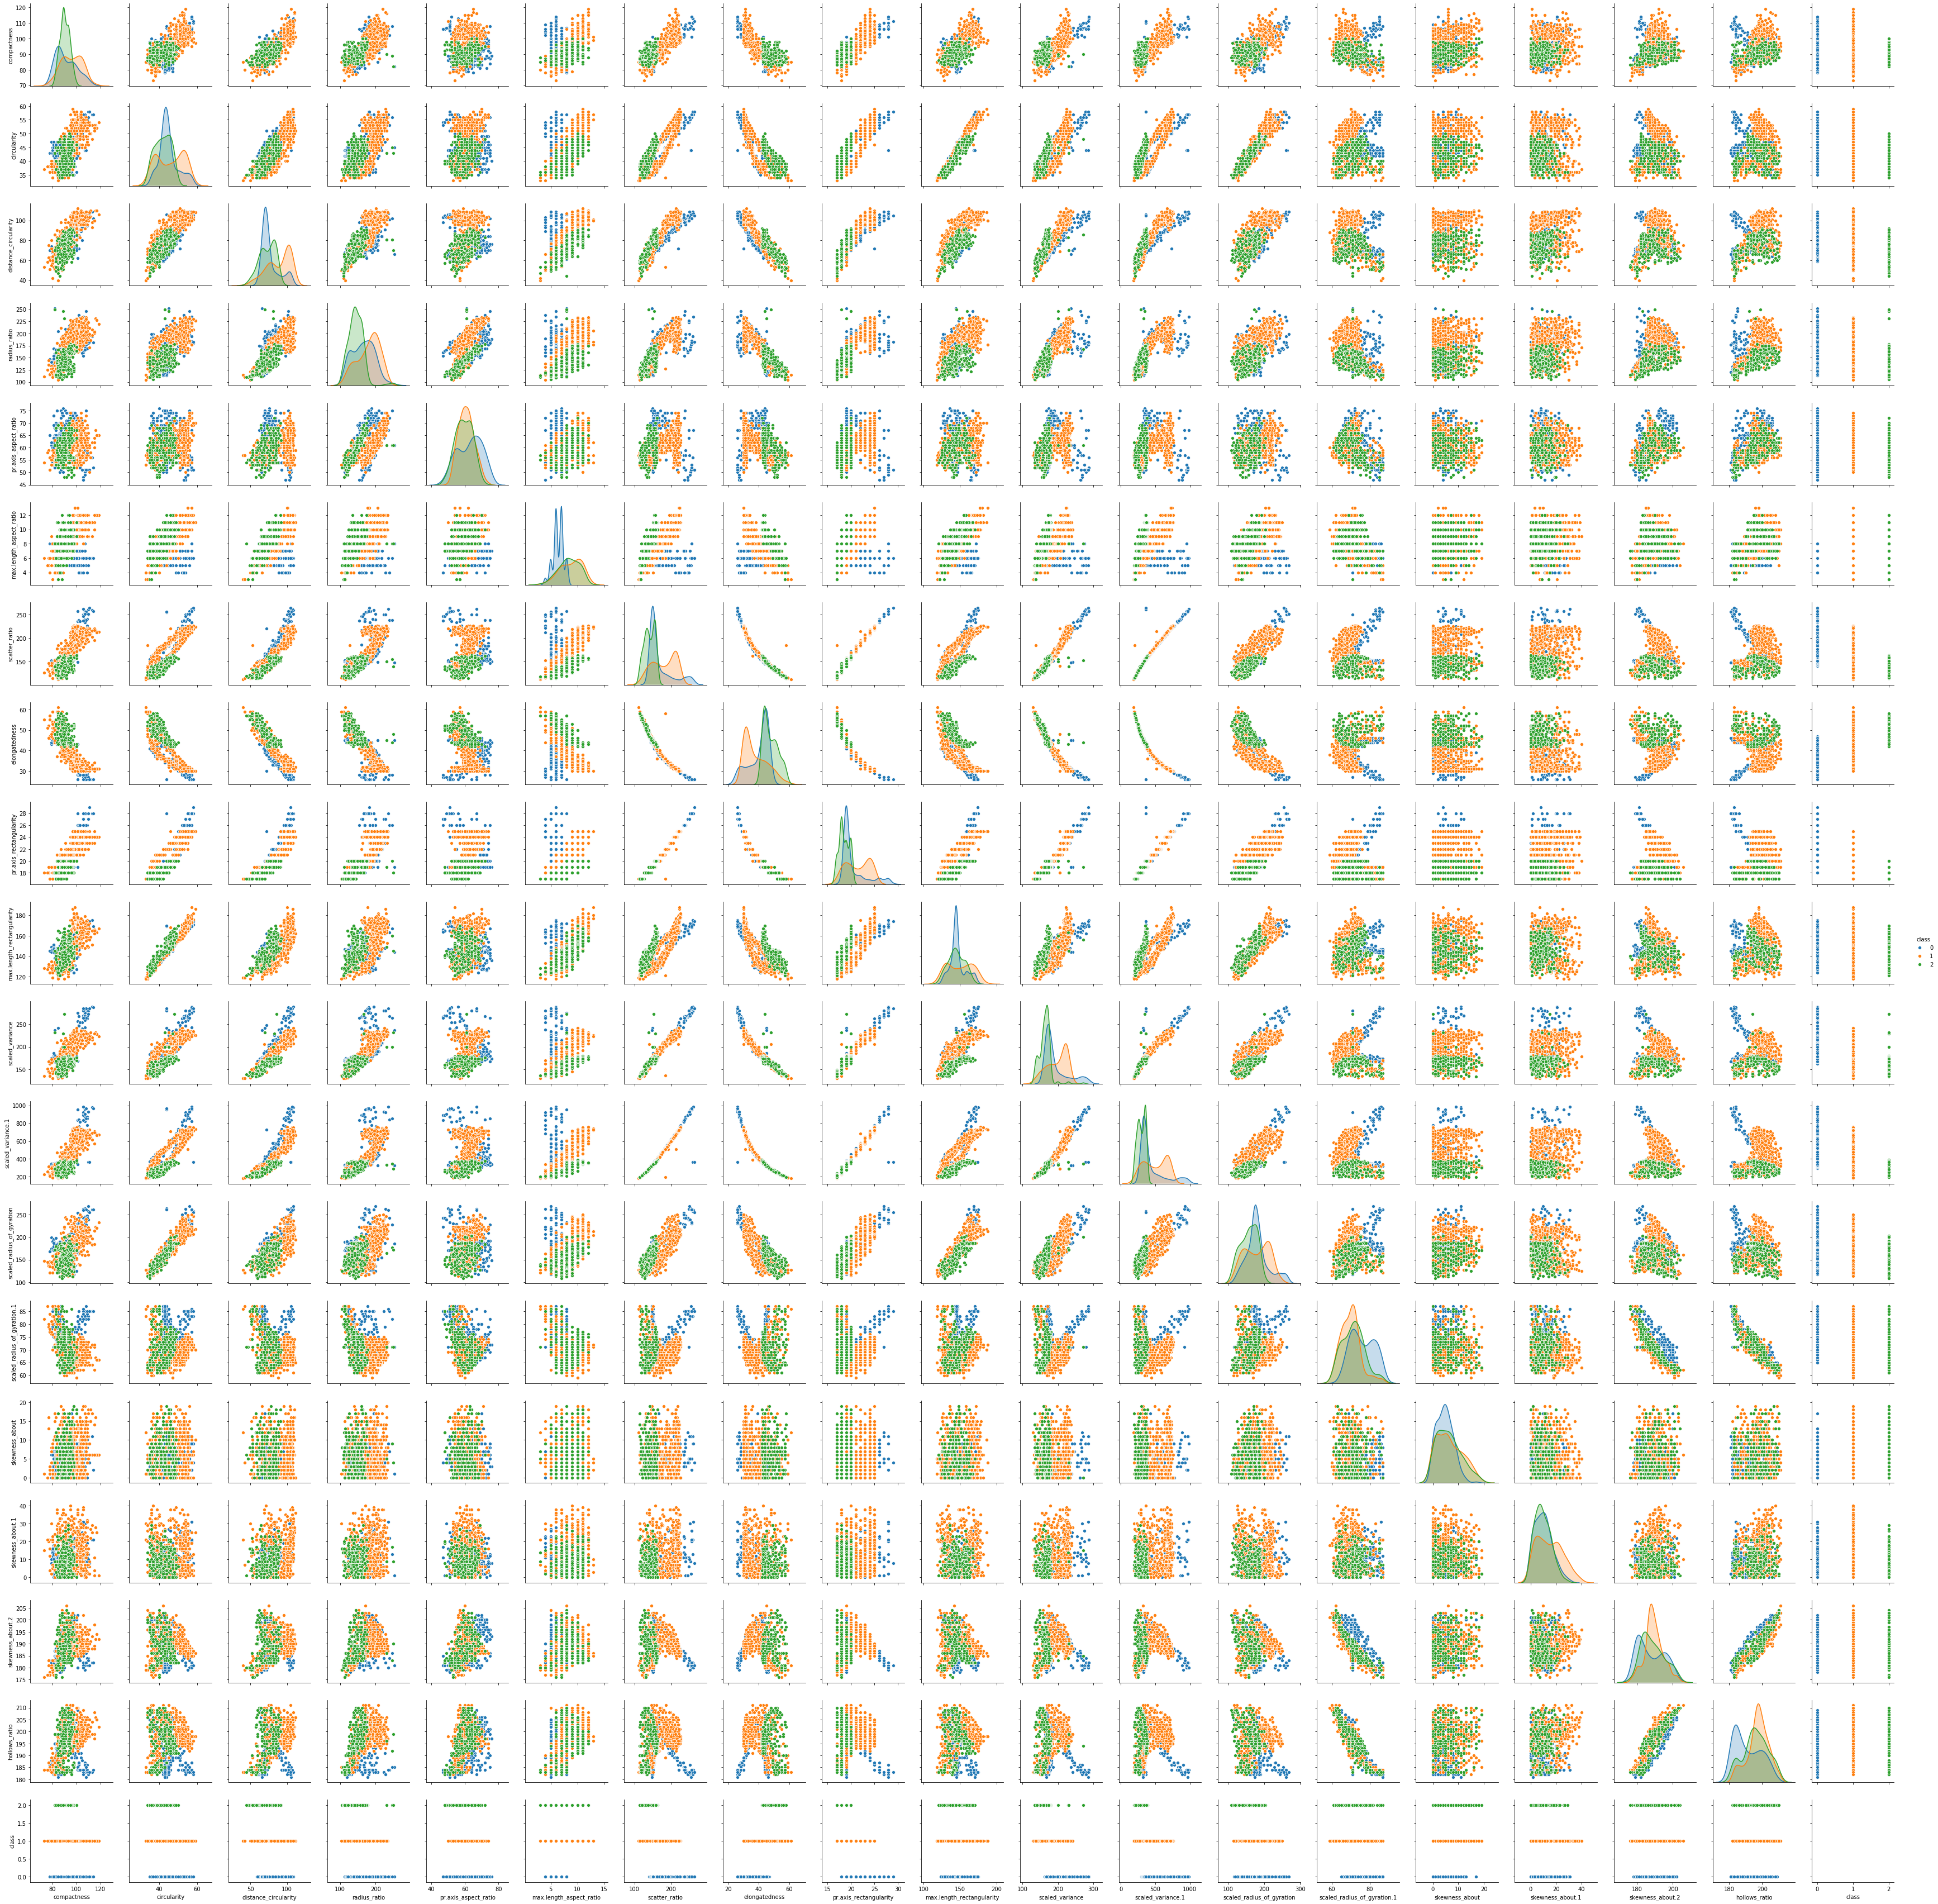

In [27]:
import seaborn as sns
sns.pairplot(df_vehicle,hue='class')

In [28]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [29]:
X=df_vehicle.drop('class',axis=1) # Assinging all features to X except the target variable, hence demarcating 
Y=df_vehicle[['class']]  # Assiging only target feature to Y

In [30]:
Y.shape

(846, 1)

In [31]:
X_std=X.apply(zscore)  # Standardizing the data using zscore

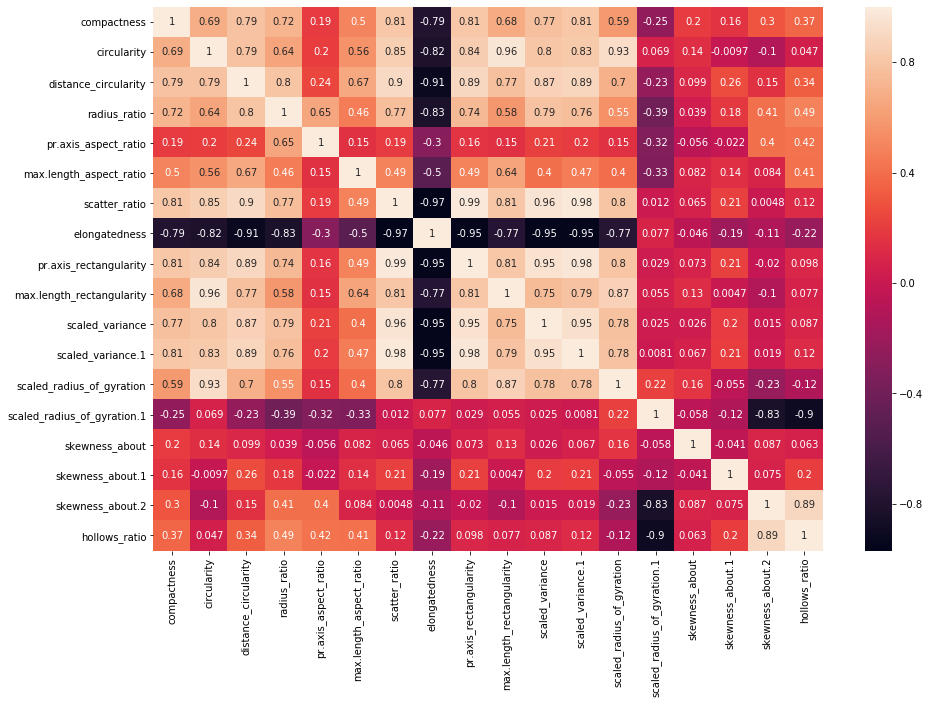

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(X_std.corr(),annot=True) #Plotting the correlation matrix depicting features relationship

In [33]:
X_train_std,X_test_std,Y_train,Y_test=train_test_split(X_std,Y,test_size=0.25)

In [34]:
cov_matrix = np.cov(X_train_std.T) #Finidng covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.97935045  0.65409495  0.77918853  0.72794362  0.20499092  0.50508183
   0.78965821 -0.77319692  0.79295921  0.65050349  0.74600094  0.79216042
   0.55273633 -0.26459347  0.2009576   0.17165577  0.29996095  0.37775028]
 [ 0.65409495  0.97455056  0.76500851  0.62113107  0.19718071  0.56628281
   0.81587724 -0.79514535  0.81676267  0.940933    0.75570761  0.80437541
   0.89297829  0.04651918  0.13043933 -0.01371965 -0.10442047  0.05928008]
 [ 0.77918853  0.76500851  0.99410626  0.79791291  0.23330345  0.6698257
   0.89045615 -0.9017116   0.8829063   0.75199474  0.85149769  0.8780288
   0.6773826  -0.26397441  0.08905075  0.28495258  0.15347288  0.35134769]
 [ 0.72794362  0.62113107  0.79791291  1.00023879  0.66727808  0.45414564
   0.77213662 -0.82907349  0.75007434  0.55816748  0.77842901  0.76997137
   0.52881666 -0.4095876   0.02850141  0.22242446  0.42861476  0.51180664]
 [ 0.20499092  0.19718071  0.23330345  0.66727808  1.0234134   0.11339709
   0.19947418 

In [35]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)  #Finiding eigen value and vector. There will be 14 eigen values and 14 list of eigen values

In [36]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72083709e-01 -8.21733374e-02  5.67426828e-02  1.32360245e-01
  -1.40985582e-01  2.46958720e-01 -2.45498882e-01 -7.50062927e-01
  -3.90337847e-01  1.18145035e-01 -4.87524545e-02 -8.44978207e-03
  -1.06395330e-01 -4.81496831e-02 -1.01453950e-01  6.39182860e-03
   4.29323417e-02 -1.28063705e-02]
 [-2.81855732e-01  1.49882957e-01  1.98222326e-01 -4.34205013e-02
   1.41713763e-01 -1.02792262e-01  3.86886416e-01 -8.92282512e-02
  -6.63840105e-02 -2.21657752e-01 -5.33103617e-02  1.40621348e-01
  -4.88505429e-02 -5.23333544e-01  2.41196633e-01  5.39851695e-02
   5.97026885e-02  5.01546451e-01]
 [-3.04227147e-01 -3.96463266e-02 -7.13985320e-02  1.22160929e-01
   6.19225859e-02  2.50854499e-03 -1.35887540e-01  3.05189828e-01
  -2.04140326e-01  1.60120972e-01 -8.12263756e-01 -8.12910390e-03
   1.15278280e-01  6.77238446e-02  1.54266849e-01 -1.67320935e-02
  -3.57665450e-02 -4.73852943e-03]
 [-2.75653246e-01 -2.02429267e-01 -5.64519375e-02 -2.60289918e-01
  -1.15507310e-01 -

In [37]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]  #Creating eigen pairs, at 0 index it will be eigen value and at index 1 it will be eigen vector
print(eigen_pairs)

[(9.569570425281333, array([-0.27208371, -0.28185573, -0.30422715, -0.27565325, -0.10196247,
       -0.20254861, -0.30862112,  0.30938079, -0.30668614, -0.27496184,
       -0.29462942, -0.30611822, -0.2551464 ,  0.05617025, -0.03537114,
       -0.06666416, -0.04545253, -0.0970153 ])), (3.2591539444561306, array([-0.08217334,  0.14988296, -0.03964633, -0.20242927, -0.26924775,
       -0.07278463,  0.07619783, -0.01466183,  0.08941715,  0.14827018,
        0.06835078,  0.07353525,  0.22612229,  0.49317792, -0.00097529,
       -0.11855654, -0.50118488, -0.49473508])), (1.1878672132036994, array([ 0.05674268,  0.19822233, -0.07139853, -0.05645194,  0.05597321,
        0.11819081, -0.10630397,  0.08965551, -0.09876011,  0.20335134,
       -0.13497892, -0.10138042,  0.19975215, -0.101774  ,  0.55057401,
       -0.68128358,  0.1053815 ,  0.0672092 ])), (1.129800059636205, array([ 0.13236025, -0.0434205 ,  0.12216093, -0.26028992, -0.6481932 ,
        0.32691052,  0.00068682,  0.0657008 ,  0.0

In [38]:
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [39]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eigen_pairs:
    print(i[0])

eigen_pairs

Eigenvalues in descending order:
9.569570425281333
3.2591539444561306
1.1878672132036994
1.129800059636205
0.9157871599701598
0.6277789276569754
0.30648473803194193
0.2296244522954111
0.12496876256478326
0.08079731683817794
0.06244199630495922
0.05512141166418448
0.03988487620268687
0.029726672145352098
0.026554425333315236
0.015908178308774116
0.0155835903925348
0.008212737165175912


[(9.569570425281333,
  array([-0.27208371, -0.28185573, -0.30422715, -0.27565325, -0.10196247,
         -0.20254861, -0.30862112,  0.30938079, -0.30668614, -0.27496184,
         -0.29462942, -0.30611822, -0.2551464 ,  0.05617025, -0.03537114,
         -0.06666416, -0.04545253, -0.0970153 ])),
 (3.2591539444561306,
  array([-0.08217334,  0.14988296, -0.03964633, -0.20242927, -0.26924775,
         -0.07278463,  0.07619783, -0.01466183,  0.08941715,  0.14827018,
          0.06835078,  0.07353525,  0.22612229,  0.49317792, -0.00097529,
         -0.11855654, -0.50118488, -0.49473508])),
 (1.1878672132036994,
  array([ 0.05674268,  0.19822233, -0.07139853, -0.05645194,  0.05597321,
          0.11819081, -0.10630397,  0.08965551, -0.09876011,  0.20335134,
         -0.13497892, -0.10138042,  0.19975215, -0.101774  ,  0.55057401,
         -0.68128358,  0.1053815 ,  0.0672092 ])),
 (1.129800059636205,
  array([ 0.13236025, -0.0434205 ,  0.12216093, -0.26028992, -0.6481932 ,
          0.32691052,

In [40]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.11041002  72.53904875  79.2557538   85.64412253  90.82237155
  94.37209988  96.10509458  97.40348862  98.11011501  98.56697731
  98.92005084  99.23173068  99.45725669  99.6253439   99.77549388
  99.86544547  99.9535617  100.        ]


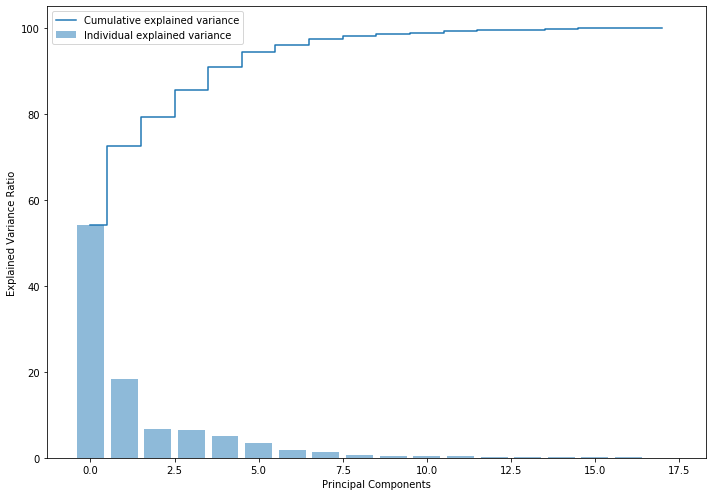

In [41]:
plt.figure(figsize=(10 , 7))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [44]:
eigvalues_sort = [eigen_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs[index][1] for index in range(len(eig_vals))]

In [45]:
P_reduce = np.array(eigvectors_sort[0:12]).transpose()   # Selecting first 12 eigen vectors of all 18

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [47]:
# complete matrix operation 
print(Y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(634, 1)


((634, 18), (18, 12), (634, 12))

# SVM

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [70]:
svc_model=SVC()
parameters={'kernel' : ('rbf','linear'),
            'C' : [0.01, 0.05, 0.5, 1]}

In [71]:
clf = GridSearchCV(svc_model, parameters)

In [72]:
clf.fit(X_train_std,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ('rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
print("best hyperparameter from the values iserted {}".format(clf.best_estimator_))

best hyperparameter from the values iserted SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [74]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [75]:
print ("Best score on training set {}".format(clf.best_score_))

Best score on training set 0.9511041009463722


In [78]:
prediction=clf.predict(X_test_std)  #Prediction on X_test

In [80]:
print("printing confusion matrix")
confusion_matrix(Y_test,prediction)

printing confusion matrix


array([[ 51,   1,   1],
       [  2, 107,   4],
       [  1,   7,  38]], dtype=int64)